# Задача: предсказать продажи магазинов  за ноябрь 2015 года

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
for dirname, _, filenames in os.walk('.\data'):
    for filename in filenames:
        print os.path.join(dirname, filename)

.\data\items.csv
.\data\item_categories.csv
.\data\sales_train.csv
.\data\sample_submission.csv
.\data\shops.csv
.\data\test.csv


In [2]:
items=pd.read_csv('.\data\items.csv')
item_categories=pd.read_csv('.\data\item_categories.csv')
shops=pd.read_csv('.\data\shops.csv')
test=pd.read_csv('.\data\\test.csv')

sales_train=pd.read_csv('.\data\sales_train.csv')
sample_submission=pd.read_csv('.\data\sample_submission.csv')

# 1) файл items

In [3]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22170 entries, 0 to 22169
Data columns (total 3 columns):
item_name           22170 non-null object
item_id             22170 non-null int64
item_category_id    22170 non-null int64
dtypes: int64(2), object(1)
memory usage: 519.7+ KB


In [4]:
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [5]:
print(len(items['item_category_id'].unique()))

84


Выводы:

1) В каталоге 22.170 различных товаров. Каждый из них имеет уникальный идентификатор (item_id)

2) Есть 84 (0, как показано ниже) различных категорий (item_category_id), и каждый продукт классифицирован.

3) Нет NaN.

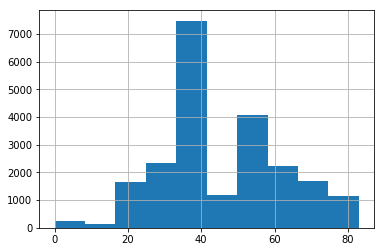

In [6]:
items['item_category_id'].hist()

# 2) файл item_categories

In [7]:
item_categories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
item_category_name    84 non-null object
item_category_id      84 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.4+ KB


In [8]:
item_categories.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


Выводы:

1) Есть 84 различных категории (начиная с 0 до 83)

2) У каждой категории есть имя (первое слово - категория товара?)

Заметим, что первое слово столбца item_category_name задает глобальную категорию товара, добавим в файл новый признак (glob_item_category)

In [9]:
item_categories['glob_item_category'] = item_categories['item_category_name'].apply(lambda x: x.strip().split()[0])
print(item_categories['glob_item_category'].value_counts())

Игры          14
Книги         13
Подарки       12
Игровые        8
Аксессуары     7
Музыка         6
Программы      6
Карты          5
Кино           5
Чистые         2
Служебные      2
Элементы       1
Билеты         1
PC             1
Доставка       1
Name: glob_item_category, dtype: int64


# 3) файл shops

In [10]:
shops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
shop_name    60 non-null object
shop_id      60 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.0+ KB


In [11]:
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


Вывод:

1) Есть 60 магазинов (идентификаторы от 0 до 59)

2) У каждого есть имя (из него можно узнать город в котором располагается магазин)

Заметим, что из столбца shop_name, можно выделить такой признак, как город магазина (city)

In [12]:
shops['city'] = shops['shop_name'].apply(lambda x: x.lower().strip().split()[0])
shops['city'].value_counts()

Москва              13
Тюмень               3
Воронеж              3
РостовНаДону         3
Красноярск           2
СПб                  2
!Якутск              2
Казань               2
Жуковский            2
Самара               2
Якутск               2
Н.Новгород           2
Новосибирск          2
Уфа                  2
Мытищи               1
Волжский             1
Курск                1
Балашиха             1
Омск                 1
Томск                1
Выездная             1
Сергиев              1
Коломна              1
Интернет-магазин     1
Сургут               1
Калуга               1
Адыгея               1
Ярославль            1
Цифровой             1
Химки                1
Чехов                1
Вологда              1
Name: city, dtype: int64

# 4) sales_train

In [13]:
sales_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
date              object
date_block_num    int64
shop_id           int64
item_id           int64
item_price        float64
item_cnt_day      float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


In [14]:
sales_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [15]:
sales_train.describe() #видно, что есть отрицательные значения в item_price (неверная цена)

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03


Выводы:

1) Обучающие данные содержат 3 миллиона событий

2) Нет NaN

3) Есть выбросы (например отрицательное значение item_price)

### 4.1. Исследуем каждый признак на выбросы.

#### 4.1.1. item_price

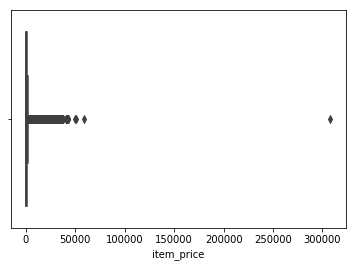

In [16]:
sns.boxplot(sales_train.item_price, data=sales_train)

In [17]:
print(sales_train['item_price'].min())
print(sales_train['item_price'].max())

-1.0
307980.0


Разберем выброс с отрицательной ценой

In [18]:
sales_train[sales_train['item_price']==-1] #событие с отрицательной ценой

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
484683,15.05.2013,4,32,2973,-1.0,1.0


In [19]:
sales_train[sales_train['item_id']==2973]['item_price'].value_counts().head() 
#видим, что данный выброс обусловлен ошибкой в заполнении даных item_price

2499.0    444
1249.5    124
1249.0     96
1901.0     28
1250.0     12
Name: item_price, dtype: int64

In [20]:
sales_train[(sales_train['item_id']==2973) & (sales_train['date']=='14.05.2013')] #цена за день до ошибки

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
453035,14.05.2013,4,25,2973,1249.1,2.0
456795,14.05.2013,4,21,2973,1249.0,1.0
463473,14.05.2013,4,41,2973,1249.0,1.0
473481,14.05.2013,4,42,2973,1249.0,1.0
480577,14.05.2013,4,35,2973,1249.5,1.0
521031,14.05.2013,4,43,2973,1249.0,1.0


In [21]:
sales_train[(sales_train['item_id']==2973) & (sales_train['date']=='16.05.2013')] #цена за день после ошибки

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
442084,16.05.2013,4,28,2973,1249.0,1.0
465054,16.05.2013,4,44,2973,1249.0,1.0


In [22]:
sales_train.loc[sales_train.index == 484683, sales_train.columns == 'item_price'] = 1249. #устраним ошибку в данных

Разберем выброс с максимальной ценой

In [23]:
sales_train[sales_train['item_price']==307980.0] #событие с максимальной ценой

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
1163158,13.12.2013,11,12,6066,307980.0,1.0


In [24]:
sales_train[sales_train['item_id']==6066] #данный item продавался единственный раз

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
1163158,13.12.2013,11,12,6066,307980.0,1.0


In [25]:
# проверим есть ли он в тестовых данных
test[test['item_id']==6066] #данного itemа нет в тестовых данных, можно удалить его из обучающих данных

,ID,shop_id,item_id


In [26]:
sales_train.drop(1163158, axis=0, inplace=True)
sales_train[sales_train['item_id']==6066] #выброс удален

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day


#### Построим гистограммы распределения признака item_price

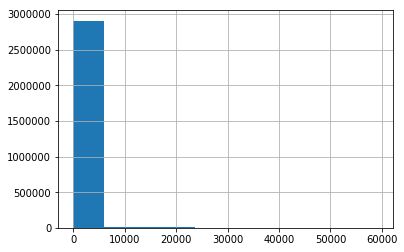

In [27]:
sales_train.item_price.hist()

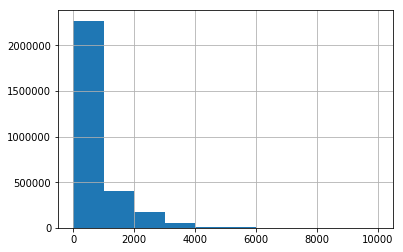

In [28]:
sales_train[sales_train.item_price <10000].item_price.hist()

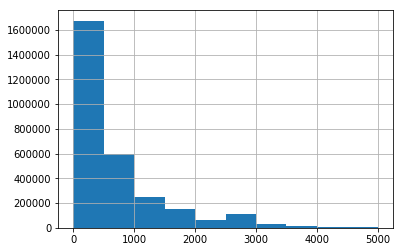

In [29]:
sales_train[sales_train.item_price <5000].item_price.hist()

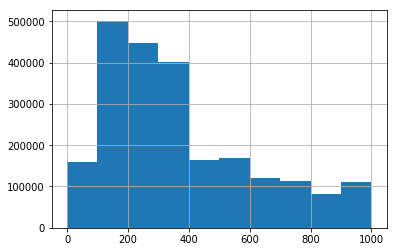

In [30]:
sales_train[sales_train.item_price <1000].item_price.hist()

### 4.1.1. item_cnt_day

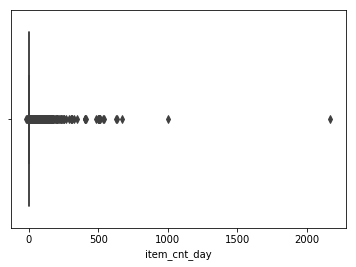

In [31]:
sns.boxplot(sales_train.item_cnt_day, data=sales_train)

In [32]:
print sales_train.item_cnt_day.min()
print sales_train.item_cnt_day.max()

-22.0
2169.0


In [33]:
sales_train[sales_train.item_cnt_day<0].item_cnt_day.value_counts() #отрицательные значения item_cnt_day являются возвратами, оставим их

-1.0     7252
-2.0       78
-3.0       14
-5.0        4
-4.0        3
-6.0        2
-9.0        1
-16.0       1
-22.0       1
Name: item_cnt_day, dtype: int64

Разберемся с максимальными значениями item_cnt_day

In [34]:
sales_train[sales_train.item_cnt_day>800] #видим, что максимальные значения в одном и том же магазине, проверим его

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2326930,15.01.2015,24,12,20949,4.000000,1000.0
2909818,28.10.2015,33,12,11373,0.908714,2169.0


In [35]:
shops[shops['shop_id']==12] #видим, что это интернет магазин

,shop_name,shop_id,city
12,Интернет-магазин ЧС,12,Интернет-магазин


In [36]:
items[(items['item_id']==20949) | (items['item_id']==11373)]

,item_name,item_id,item_category_id
11373,Доставка до пункта выдачи (Boxberry),11373,9
20949,Фирменный пакет майка 1С Интерес белый (34*42)...,20949,71


In [37]:
test[test['item_id']==11373].head()

,ID,shop_id,item_id
1596,1596,5,11373
6696,6696,4,11373
11796,11796,6,11373
16896,16896,3,11373
21996,21996,2,11373


In [38]:
test[test['item_id']==20949].head()

,ID,shop_id,item_id
460,460,5,20949
5560,5560,4,20949
10660,10660,6,20949
15760,15760,3,20949
20860,20860,2,20949


In [39]:
test[test['shop_id']==12].head()

,ID,shop_id,item_id
35700,35700,12,5037
35701,35701,12,5320
35702,35702,12,5233
35703,35703,12,5232
35704,35704,12,5268


In [40]:
sales_train[(sales_train['shop_id']==12) & (sales_train['item_id']==20949)]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2257299,19.12.2014,23,12,20949,4.0,500.0
2326930,15.01.2015,24,12,20949,4.0,1000.0
2909401,14.10.2015,33,12,20949,4.0,500.0


In [41]:
print(sales_train[(sales_train['shop_id']==12) & (sales_train['item_id']==11373)]['item_cnt_day'].mean())
print(sales_train[(sales_train['shop_id']==12) & (sales_train['item_id']==11373)]['item_price'].mean())

14.1443965517
367.548909224


Видим, что среднее число Доставка до пункта выдачи (Boxberry) составляет в интернет магазине 14,1, что значительно 
больше, чем данные за 28октября 2015 года, имеет место выброс, кроме того, цена за данную услугу всего 0,9 что значительно 
отличается от среднего значения цены на даную услугу (367,5). Удалим данный выброс из данных

In [42]:
sales_train.drop(2909818, axis=0, inplace=True)

### 4.2. Создание новых признаков

In [101]:
sales_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


#### 4.2.1. Месяц, день, год

In [109]:
sales_train['date'] = pd.to_datetime(sales_train['date'], format = '%d.%m.%Y')

In [111]:
sales_train['month'] = sales_train['date'].apply(lambda x: x.month)
sales_train['day'] = sales_train['date'].apply(lambda x: x.day)
sales_train['year'] = sales_train['date'].apply(lambda x: x.year)
sales_train.drop('date',axis=1, inplace=True)
sales_train.head()

,date_block_num,shop_id,item_id,item_price,item_cnt_day,month,day,year
0,0,59,22154,999.00,1.0,1,2,2013
1,0,25,2552,899.00,1.0,1,3,2013
2,0,25,2552,899.00,-1.0,1,5,2013
3,0,25,2554,1709.05,1.0,1,6,2013
4,0,25,2555,1099.00,1.0,1,15,2013


# 5) Файл test

In [43]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214200 entries, 0 to 214199
Data columns (total 3 columns):
ID         214200 non-null int64
shop_id    214200 non-null int64
item_id    214200 non-null int64
dtypes: int64(3)
memory usage: 4.9 MB


In [44]:
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [45]:
test.describe()

,ID,shop_id,item_id
count,214200.000000,214200.000000,214200.000000
mean,107099.500000,31.642857,11019.398627
std,61834.358168,17.561933,6252.644590
min,0.000000,2.000000,30.000000
25%,53549.750000,16.000000,5381.500000
50%,107099.500000,34.500000,11203.000000
75%,160649.250000,47.000000,16071.500000
max,214199.000000,59.000000,22167.000000


Выводы:

1) Задача предсказать продажи каждого аксесуара на ноябрь 2015 года

2) Тестовые данные содержат 214200 событий.

3) В тестовом наборе присутствуют не все существующие магазины и не все товары

4) Нет информации о  ценах товаров

### 5.1) Проверим какие магазины есть в тестовых данных а каких нет

In [46]:
len(test['shop_id'].unique()) #видим, что всего 42 магазина, возможно какие то из магазинов были закрыты раньше ноября 2015 года?

42

Сперва, узнаем как давно работают магазины и есть ли закрытые среди них

In [47]:
shop_life = pd.DataFrame(columns=["shop_id","Start", "Stop", 'Delta'])
shop_life['shop_id'] = np.arange(60) 
shop_life['Start'] = sales_train.groupby("shop_id")["date_block_num"].min()
shop_life['Stop'] = sales_train.groupby("shop_id")["date_block_num"].max()
shop_life['Delta'] = shop_life['Stop'] - shop_life['Start']
shop_life.sort_values(by='Delta')

,shop_id,Start,Stop,Delta
11,11,25,25,0
36,36,33,33,0
0,0,0,1,1
1,1,0,1,1
23,23,0,3,3
8,8,0,3,3
32,32,0,6,6
33,33,19,27,8
40,40,14,24,10
20,20,21,33,12


Подозрительно выглядят 11 и 36 магазины, длительность их работы 0 месяцев. Посмотрим а эти магазины подробнее.

In [48]:
shops[(shops['shop_id']==11) | (shops['shop_id']==36)]

,shop_name,shop_id,city
11,Жуковский ул. Чкалова 39м²,11,Жуковский
36,"Новосибирск ТРЦ ""Галерея Новосибирск""",36,Новосибирск


In [49]:
shops[shops['city']=='Жуковский'] #видим, что магазин Жуковский 10 и 11 имеют одинаковое название, возможно это один и тот же магазин

,shop_name,shop_id,city
10,Жуковский ул. Чкалова 39м?,10,Жуковский
11,Жуковский ул. Чкалова 39м²,11,Жуковский


In [50]:
print sales_train[sales_train['shop_id']==11]['date_block_num'].unique()
print sales_train[sales_train['shop_id']==10]['date_block_num'].unique()

[25]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 26 27 28 29 30 31 32 33]


Видим, что это действительно один и тот же магазин, просто данные были записаны не правильно в 25 месяце. Объединим их.

In [51]:
sales_train.loc[sales_train['shop_id']==11, sales_train.columns == 'shop_id']=10 

In [52]:
shops.drop(11, axis=0, inplace=True) #удалим информацию о 11 магазине из списка магазинов

Проверка магазина в Новосибирске показывает, что это просто новый магазин

Так же подозрительно выглядят магазины 0 и 1, работавшие всего 1 месяц. Проверим их.

In [53]:
shops[(shops['shop_id']==0) | (shops['shop_id']==1)]

,shop_name,shop_id,city
0,"!Якутск Орджоникидзе, 56 фран",0,!Якутск
1,"!Якутск ТЦ ""Центральный"" фран",1,!Якутск


In [54]:
shops[shops['city']=='Якутск']

,shop_name,shop_id,city
57,"Якутск Орджоникидзе, 56",57,Якутск
58,"Якутск ТЦ ""Центральный""",58,Якутск


Видим, что название магазинов 0-57 и 1-58 совпадают, наверное это тоже одинаковые магазины

In [55]:
print sales_train[sales_train['shop_id']==0]['date_block_num'].unique()
print sales_train[sales_train['shop_id']==57]['date_block_num'].unique()

[0 1]
[ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33]


In [56]:
print sales_train[sales_train['shop_id']==1]['date_block_num'].unique()
print sales_train[sales_train['shop_id']==58]['date_block_num'].unique()

[0 1]
[ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33]


Действительно, так и есть. Объединим эти магазины.

In [57]:
sales_train.loc[sales_train['shop_id']==0, sales_train.columns == 'shop_id']=57 
shops.drop(0, axis=0, inplace=True) #удалим информацию о 0 магазине из списка магазинов

In [58]:
sales_train.loc[sales_train['shop_id']==1, sales_train.columns == 'shop_id']=58 
shops.drop(1, axis=0, inplace=True) #удалим информацию о 0 магазине из списка магазинов

Аналогично, проверим магазины 23 и 8, работавшие 3 месяца

In [59]:
shops[(shops['shop_id']==23) | (shops['shop_id']==8)]

,shop_name,shop_id,city
8,"Воронеж ТРЦ Сити-Парк ""Град""",8,Воронеж
23,"Москва ТК ""Буденовский"" (пав.А2)",23,Москва


In [60]:
shops[shops['city']=='Воронеж']

,shop_name,shop_id,city
6,"Воронеж (Плехановская, 13)",6,Воронеж
7,"Воронеж ТРЦ ""Максимир""",7,Воронеж
8,"Воронеж ТРЦ Сити-Парк ""Град""",8,Воронеж


In [61]:
print sales_train[sales_train['shop_id']==6]['date_block_num'].unique()
print sales_train[sales_train['shop_id']==7]['date_block_num'].unique()
print sales_train[sales_train['shop_id']==8]['date_block_num'].unique() # Видим, что в Воронеже магазин скорее всего просто закрылся

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33]
[0 1 2 3]


In [62]:
shops[shops['city']=='Москва'] # видим, что в москве в тц буденовском два магазина, проверим их

,shop_name,shop_id,city
20,"Москва ""Распродажа""",20,Москва
21,"Москва МТРЦ ""Афи Молл""",21,Москва
22,Москва Магазин С21,22,Москва
23,"Москва ТК ""Буденовский"" (пав.А2)",23,Москва
24,"Москва ТК ""Буденовский"" (пав.К7)",24,Москва
25,"Москва ТРК ""Атриум""",25,Москва
26,"Москва ТЦ ""Ареал"" (Беляево)",26,Москва
27,"Москва ТЦ ""МЕГА Белая Дача II""",27,Москва
28,"Москва ТЦ ""МЕГА Теплый Стан"" II",28,Москва
29,"Москва ТЦ ""Новый век"" (Новокосино)",29,Москва


In [63]:
print sales_train[sales_train['shop_id']==23]['date_block_num'].unique()
print sales_train[sales_train['shop_id']==24]['date_block_num'].unique() #работали одновременно, значит они разные

[0 1 2 3]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33]


Обновим данные в  таблице shop_life с исправления ошибок в  данных магазинов

In [64]:
shop_life = pd.DataFrame(columns=["shop_id","Start", "Stop", 'Delta'])
shop_life['shop_id'] = np.arange(60) 
shop_life['Start'] = sales_train.groupby("shop_id")["date_block_num"].min()
shop_life['Stop'] = sales_train.groupby("shop_id")["date_block_num"].max()
shop_life['Delta'] = shop_life['Stop'] - shop_life['Start']
shop_life.drop([0,1,11], axis=0,inplace=True)
shop_life.sort_values(by='Delta').astype(int)

,shop_id,Start,Stop,Delta
36,36,33,33,0
23,23,0,3,3
8,8,0,3,3
32,32,0,6,6
33,33,19,27,8
40,40,14,24,10
20,20,21,33,12
34,34,18,33,15
48,48,15,33,18
39,39,14,33,19


In [65]:
close_shop_set = set(shop_life[shop_life['Stop']<33]['shop_id']) #закрытые магазины
len(close_shop_set)

13

In [66]:
open_shop_set = set(shop_life[shop_life['Stop']==33]['shop_id']) #открытые магазины
len(open_shop_set)

44

In [67]:
test_shop_set = set(test['shop_id'].unique())
len(test_shop_set)

42

In [68]:
print (len(set(test['shop_id']) | set(close_shop_set))) # колличество закрытых магазинов + магазины из тестового набора

55


In [69]:
print(set(shops['shop_id']) - (set(test['shop_id']) | set(close_shop_set))) #список открытых магазинов, которых нет в тестовых данных

set([9L, 20L])


In [70]:
shops[(shops['shop_id']==9)| (shops['shop_id']==20)] 
#этих магазинов нет в тестовом наборе данных, несмотря на то, что они работают возможно стоит удалить их из обучающих данных

,shop_name,shop_id,city
9,Выездная Торговля,9,Выездная
20,"Москва ""Распродажа""",20,Москва


In [76]:
sales_train[(sales_train["shop_id"]==9) | (sales_train["shop_id"]==20)].groupby(["shop_id","date_block_num"]).count() 

date  item_id  item_price  item_cnt_day
shop_id date_block_num                                         
9       9               1488     1488        1488          1488
        21              1417     1417        1417          1417
        27                 1        1           1             1
        33               845      845         845           845
20      21               945      945         945           945
        33               847      847         847           847

Магазины 9 и 20 работают всего четыре и три месяца в году соответственно. 

Посмотрим на товары, продающиеся в этих магазинах.

In [86]:
set_item_9 = set(sales_train[(sales_train["shop_id"]==9)]['item_id'].unique())
set_item_20 = set(sales_train[(sales_train["shop_id"]==20)]['item_id'].unique())
print len(set_item_9)
print len(set_item_20)

1404
746


In [88]:
set_item_test = set(test['item_id'].unique())
len(set_item_test)
print len(set_item_test & set_item_20) 
print len(set_item_test & set_item_9)

400
630


Видим, что часть товаров, которые продаются в этих магазинах есть и в тестовом наборе, поэтому просто так удалять информацию о магазинах нельзя

# 6) Сохранение полученных данных

In [89]:
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [91]:
items.drop('item_name', axis=1, inplace=True)

In [93]:
items.to_csv('.\data\items_new.csv', index=)

In [94]:
item_categories.head()

,item_category_name,item_category_id,glob_item_category
0,PC - Гарнитуры/Наушники,0,PC
1,Аксессуары - PS2,1,Аксессуары
2,Аксессуары - PS3,2,Аксессуары
3,Аксессуары - PS4,3,Аксессуары
4,Аксессуары - PSP,4,Аксессуары


In [95]:
item_categories.drop('item_category_name', axis=1, inplace=True)
item_categories.to_csv('.\data\item_categories_new.csv')

In [98]:
shops.head()

,shop_name,shop_id,city
2,"Адыгея ТЦ ""Мега""",2,Адыгея
3,"Балашиха ТРК ""Октябрь-Киномир""",3,Балашиха
4,"Волжский ТЦ ""Волга Молл""",4,Волжский
5,"Вологда ТРЦ ""Мармелад""",5,Вологда
6,"Воронеж (Плехановская, 13)",6,Воронеж


In [99]:
shops.drop('shop_name', axis=1, inplace=True)
shops.to_csv('.\data\shops_new.csv')

In [114]:
sales_train.head()

,date_block_num,shop_id,item_id,item_price,item_cnt_day,month,day,year
0,0,59,22154,999.00,1.0,1,2,2013
1,0,25,2552,899.00,1.0,1,3,2013
2,0,25,2552,899.00,-1.0,1,5,2013
3,0,25,2554,1709.05,1.0,1,6,2013
4,0,25,2555,1099.00,1.0,1,15,2013


In [115]:
sales_train.to_csv('.\data\sales_train_new.csv')